# School Enrollment by Neighborhood

## Intro
To choose the best neighborhood in Pittsburgh, I chose the amount of enrollments in each neighborhood as a metric.  Since the number of students that are enrolled within each neighborhood shows the importance of education within each neighborhood.  But as well the availability of education to the youth of each area.  

Before getting into the code and sorting through the data set we first need to import pandas and matplotlib so that we can read in the data set and eventually plot it.  After doing so I can now able to drop all the columns that I do not need to look at and then drop all the rows that have no data for students enrolled.  Then I am able to sort the data and see the first top 20.

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

#read in the dataset
enrollData = pd.read_csv("enrollments.csv")

#drop columns useless columns that aren't needed
enrollData = enrollData.drop(columns=["african_american","american_indian","asian__not_pacific_islander","hispanic","multiracial"
                                     ,"native_hawaiian_or_other_pacific_islander","white","attending_feeder","attending_nonfeeder","student_count_redactions"
                                     ,"total_with_feeder_status","feeder_count_redactions"])

#drops rows that do not have any data
enrollData=enrollData.dropna()

#prints the first 20 neighborhoods
enrollData.head(20)

#sorts the data with the top being the most students enrolled
enrollData = enrollData.sort_values(by=['total_students_enrolled'], ascending=False)

In [79]:
enrollData.head(20)

,neighborhood,total_students_enrolled,grade_level
107,Carrick,541.0,K-5
105,Brookline,526.0,K-5
286,Carrick,378.0,9-12
99,Beechview,339.0,K-5
284,Brookline,310.0,9-12
104,Brighton Heights,296.0,K-5
197,Carrick,293.0,6-8
168,Squirrel Hill South,286.0,K-5
131,Homewood North,282.0,K-5
195,Brookline,276.0,6-8


It can be seen in the table above that there are actually multiple groups of students that are actually being accounted for instead of just the whole total K-12.  Instead they are separted which causes a neighborhood to appear more than once within the top 20.  Which is why I need to group by neighborhoods and add up all the total students within each grade cluster.

In [80]:
# aggregate function to combine all the neighborhoods and add up all the students
combine = {"total_students_enrolled":"sum"}

# groups by neighborhood and adds up all the students
enrollData = enrollData.groupby(enrollData['neighborhood']).aggregate(combine)

# resorts the data in ascending order with the highest total students first
enrollData = enrollData.sort_values(by=['total_students_enrolled'], ascending=False)

# prints the top 20 out
enrollData.head(20)

,total_students_enrolled
neighborhood,
Carrick,1276.0
Brookline,1169.0
Beechview,794.0
Sheraden,694.0
Squirrel Hill South,679.0
Knoxville,616.0
Brighton Heights,598.0
Homewood North,589.0
East Hills,569.0


Now that a neighborhood will only appear once within the dataframe and have the correct total amount of students I am now able to plot the data as a bar graph to show the drastic differences between each neighborhood.

Text(0, 0.5, 'Number of Students Enrolled')

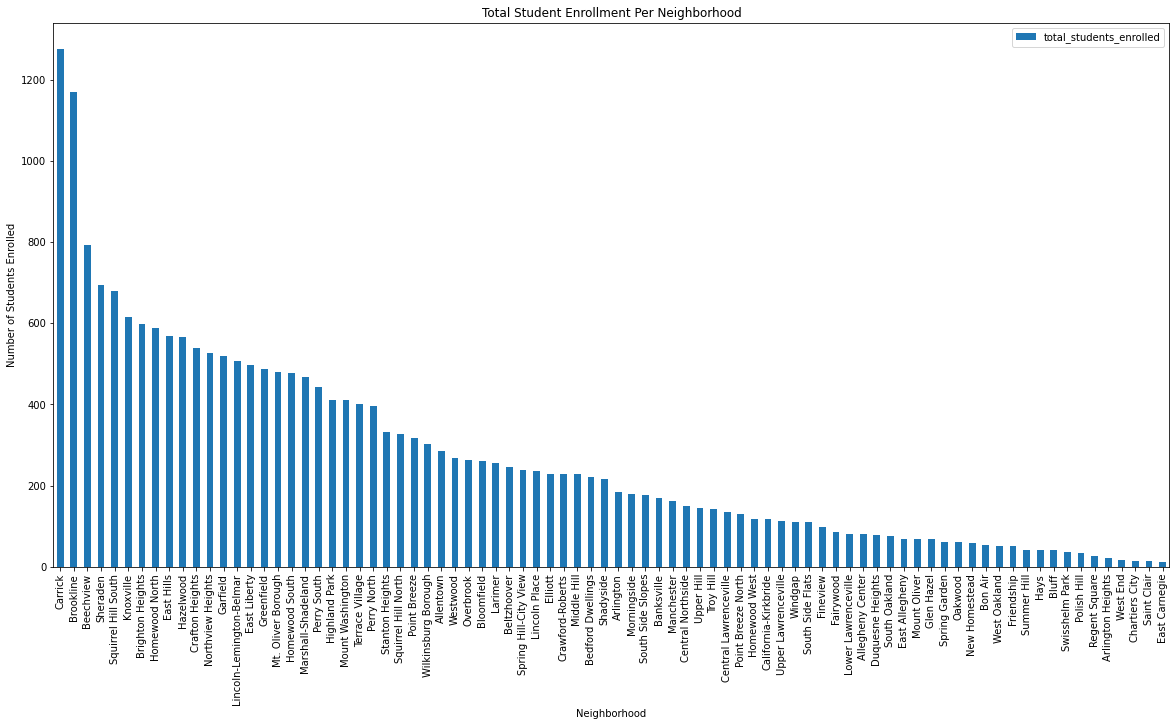

In [81]:

# Plot the data set as a bar graph
enrollData.plot(kind='bar',figsize=(20,10))

# set plot title and axis lables
plt.title('Total Student Enrollment Per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Students Enrolled')

# OUTCOME!!!
## Based off of the top 20 and the bar graph with no close contenders solely based on this metric Carrick wins as it has the most enrolled students!!!!!!